# Brent Ramirez: Exploratory Data Analysis Project

Author: Brent Ramirez
Purpose: Experiment with data analysis via Jupyter notebook
Date: 5/30/25

Hello! My name is Brent, and in this notebook, we analyze the potential correlations in data collected from different characteristics of irises. We first begin by importing our tools that we will use, including Pandas, Seaborn, and matplotlib.

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib.axes import Axes

In order to get an idea of what we are working with, we will perform some basic data analysis on the raw data from the iris data set. We can see below that our columns include the length and width of both iris sepals and petals. We can also notice that the set contains 150 rows and 5 colums, as well as the first 20 entries of the data.

In [9]:
iris_df: pd.DataFrame = sns.load_dataset('iris')

iris_df.columns

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris_df.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [12]:
iris_df.shape

(150, 5)

In [13]:
iris_df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [14]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Here we can get an idea of some basic statistics of the data set. These values could be considered directly comparable since we have the same sample size for each. It seems like the most spread out data would be the petal length, and the least would be seapl width.

In [15]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


By creating a histogram for sepal length, we can observe that the data is slightly right skewed.

<Axes: >

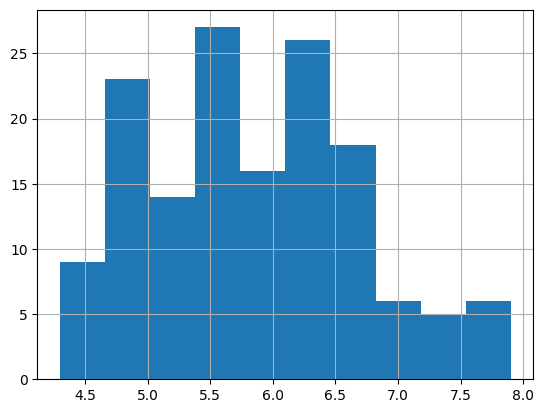

In [16]:
iris_df['sepal_length'].hist()

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

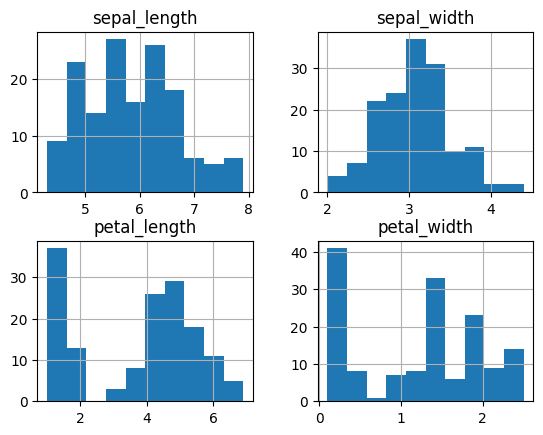

In [17]:
iris_df.hist()

In [21]:
import matplotlib.pyplot
matplotlib.pyplot.show()

It appears that the only normal distribution can be found in sepal_width, but more robust tests for normality should be conducted. 
Sepal_length appears to be slightly right skewed.

In [22]:
iris_df['petal_length'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_length, Length: 150, dtype: float64>

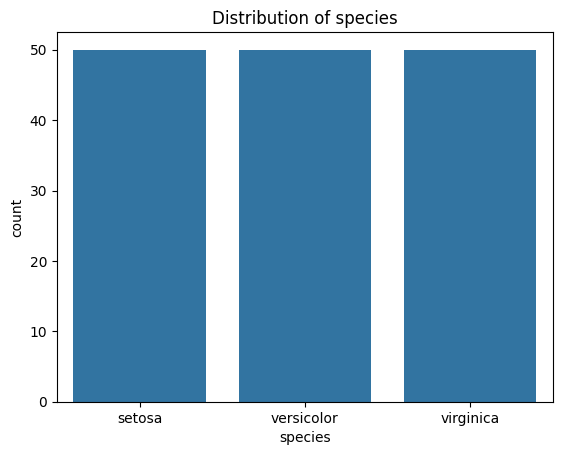

In [23]:
for column in iris_df.select_dtypes(include=['object', 'category']).columns:
    sns.countplot(x=column, data=iris_df)
    matplotlib.pyplot.title(f'Distribution of {column}')
    matplotlib.pyplot.show()

matplotlib.pyplot.show()

It appears that the counts for each species is 50, which aligns with the initial information we saw earlier where the sample sizes were equal.

In [36]:
iris_df.rename(columns={'sepal-length': 'Sepal Length', 'sepal-width': 'Sepal Width', 'petal-length': 'Petal Length', 'petal-width': 'Petal Width'}, inplace=True)

iris_df['Petal Area'] = iris_df['petal_length'] * iris_df['petal_width']

Overall, most of the plots tell us that there is at least a somewhat weak positive correlation between the variables graphed.

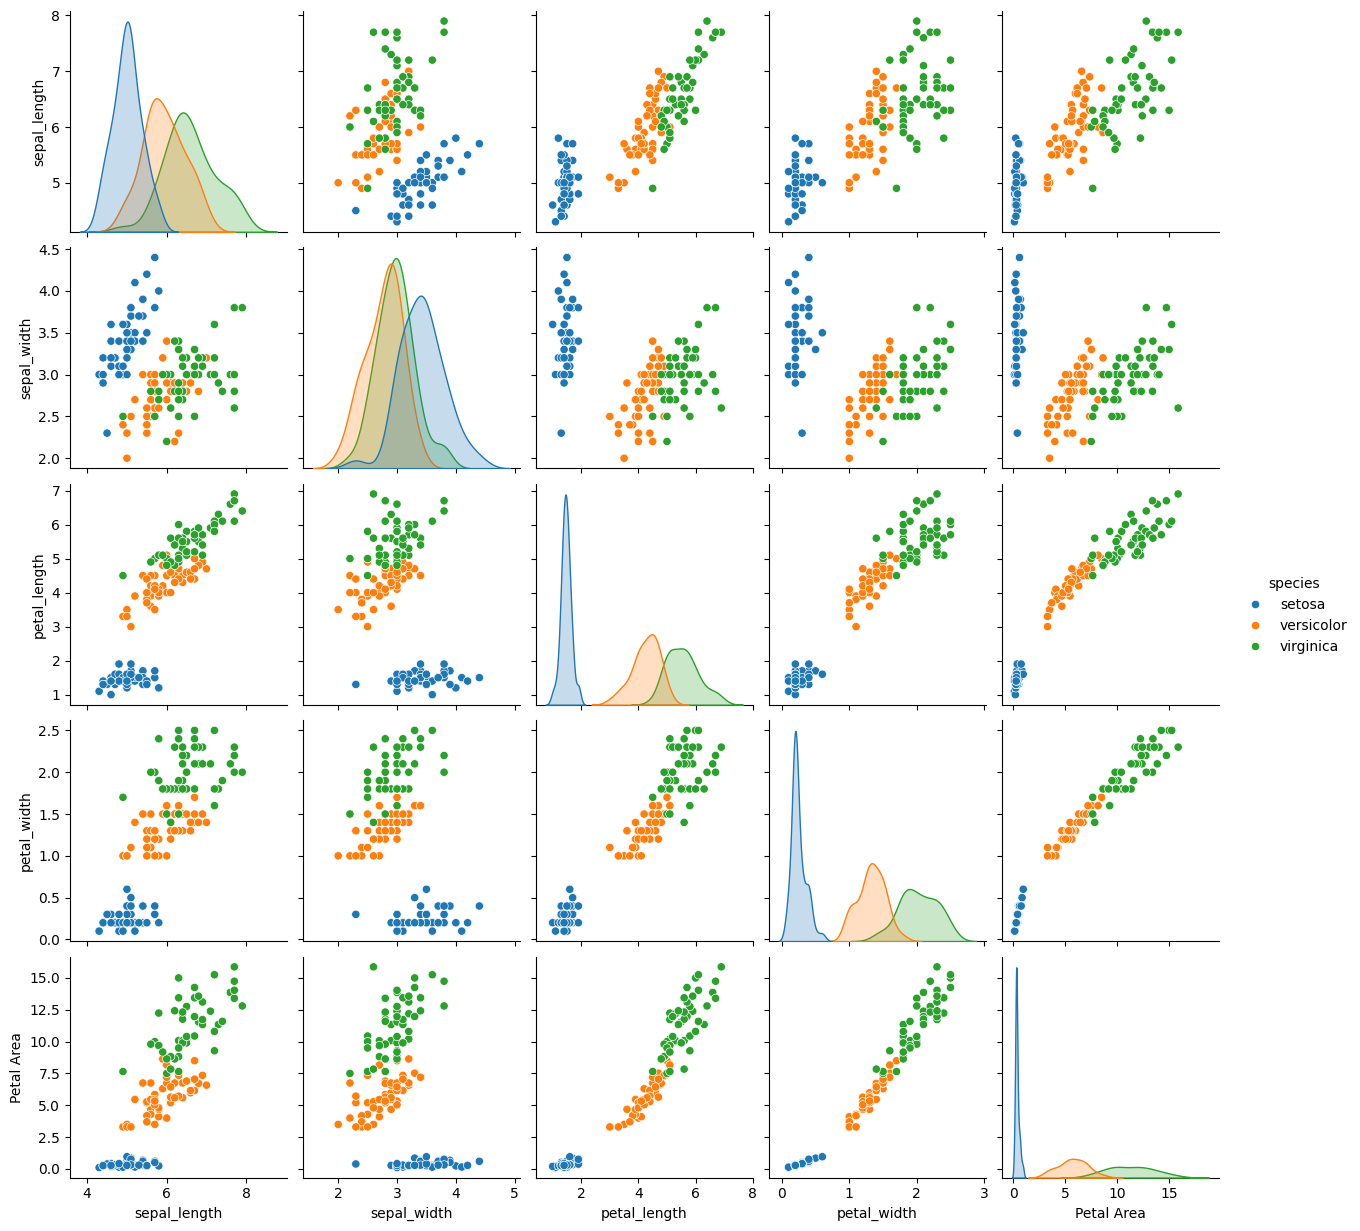

In [25]:
sns.pairplot(iris_df, hue='species')
matplotlib.pyplot.show()

In [33]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Petal Area
0,5.1,3.5,1.4,0.2,setosa,0.28
1,4.9,3.0,1.4,0.2,setosa,0.28
2,4.7,3.2,1.3,0.2,setosa,0.26
3,4.6,3.1,1.5,0.2,setosa,0.30
4,5.0,3.6,1.4,0.2,setosa,0.28


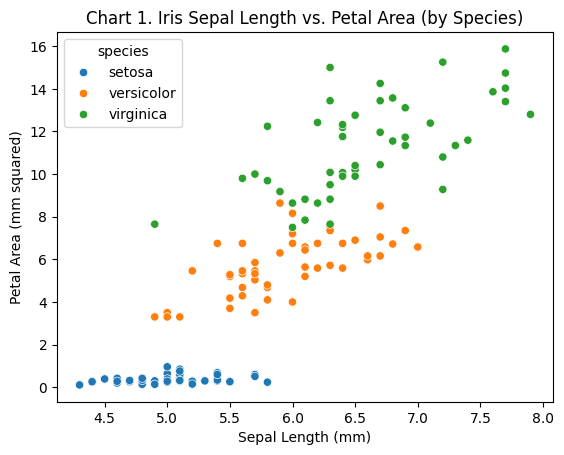

In [39]:
scatter_plt = sns.scatterplot(data=iris_df, x='sepal_length', y='Petal Area', hue='species')

scatter_plt.set_xlabel("Sepal Length (mm)")
scatter_plt.set_ylabel("Petal Area (mm squared)")

scatter_plt.set_title("Chart 1. Iris Sepal Length vs. Petal Area (by Species)")

matplotlib.pyplot.show()

Results:

There appears to be a medium positive correlation between sepal length and petal area. 

Visually, we can tenuously conclude that there is a correlation between sepal and petal measurements of irises. This may be an indicator for further research or data measurement.